In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('/Users/majkamiezianko/PycharmProjects/mnws3/data/data.csv')

df.head()

,Kod,Nazwa,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach
0,202000,Powiat dzierżoniowski,196,33,211,9.993607e+07,514
1,203000,Powiat głogowski,89,23,201,9.866435e+07,998
2,204000,Powiat górowski,109,12,47,1.272864e+08,320
3,205000,Powiat jaworski,2506,26,86,4.219230e+07,20
4,206000,Powiat karkonoski,3180,22,101,7.074027e+07,20


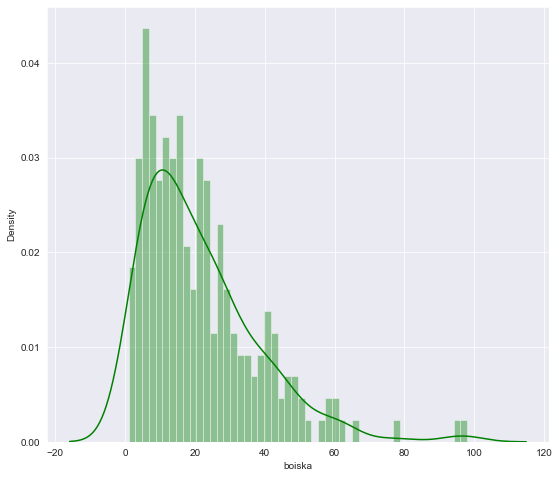

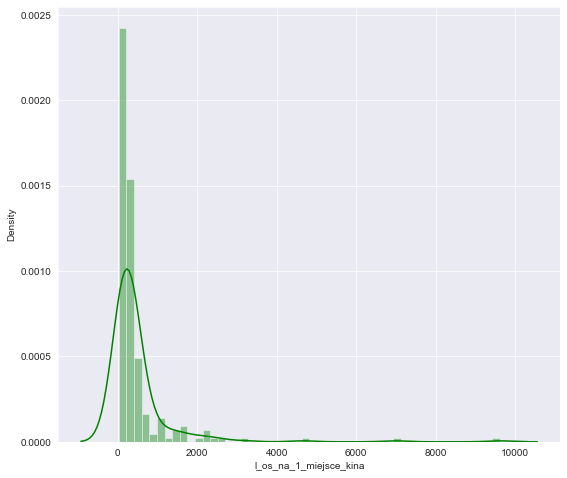

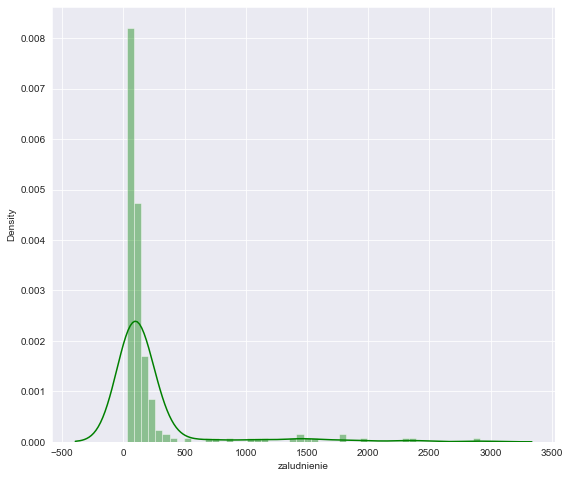

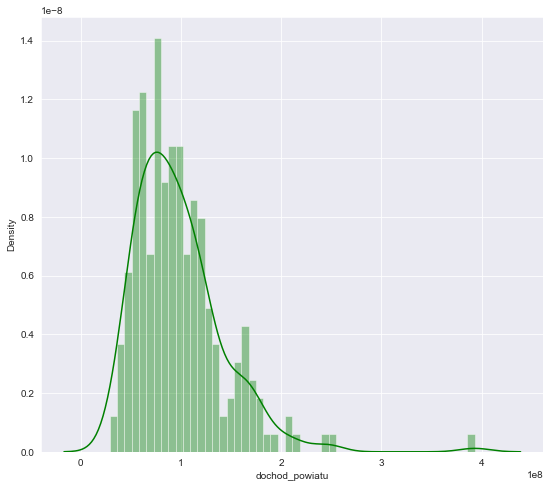

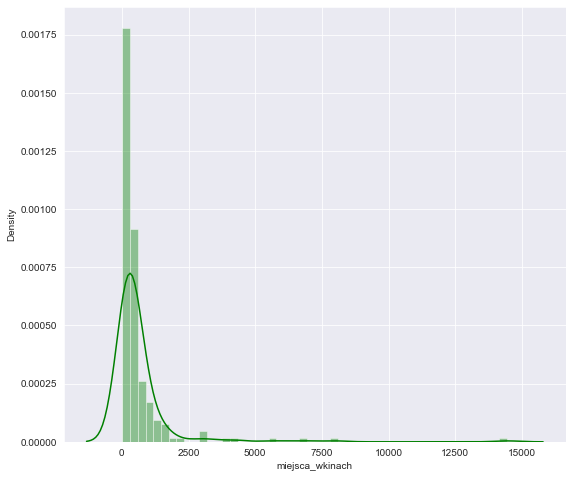

In [39]:
import warnings
warnings.simplefilter("ignore")
names = ["boiska","l_os_na_1_miejsce_kina","zaludnienie","dochod_powiatu",	"miejsca_wkinach"]
for name in names:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[name], color='g', bins=50, hist_kws={'alpha': 0.4});

In [40]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
del df_num['Kod']


In [41]:
df_num.describe()

,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach
count,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,480.848214,21.366071,216.004464,9.770999e+07,623.209821
std,938.474382,16.612975,417.802778,4.497751e+07,1324.345330
min,30.000000,1.000000,31.000000,2.899865e+07,20.000000
25%,152.750000,9.000000,63.750000,6.523544e+07,189.500000
50%,234.500000,17.500000,94.000000,8.975078e+07,303.000000
75%,406.500000,29.000000,147.250000,1.184994e+08,488.250000
max,9603.000000,98.000000,2913.000000,3.930423e+08,14443.000000


In [42]:
df_num.head()

,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach
0,196,33,211,9.993607e+07,514
1,89,23,201,9.866435e+07,998
2,109,12,47,1.272864e+08,320
3,2506,26,86,4.219230e+07,20
4,3180,22,101,7.074027e+07,20


array([[<AxesSubplot:title={'center':'l_os_na_1_miejsce_kina'}>,
        <AxesSubplot:title={'center':'boiska'}>],
       [<AxesSubplot:title={'center':'zaludnienie'}>,
        <AxesSubplot:title={'center':'dochod_powiatu'}>],
       [<AxesSubplot:title={'center':'miejsca_wkinach'}>, <AxesSubplot:>]],
      dtype=object)

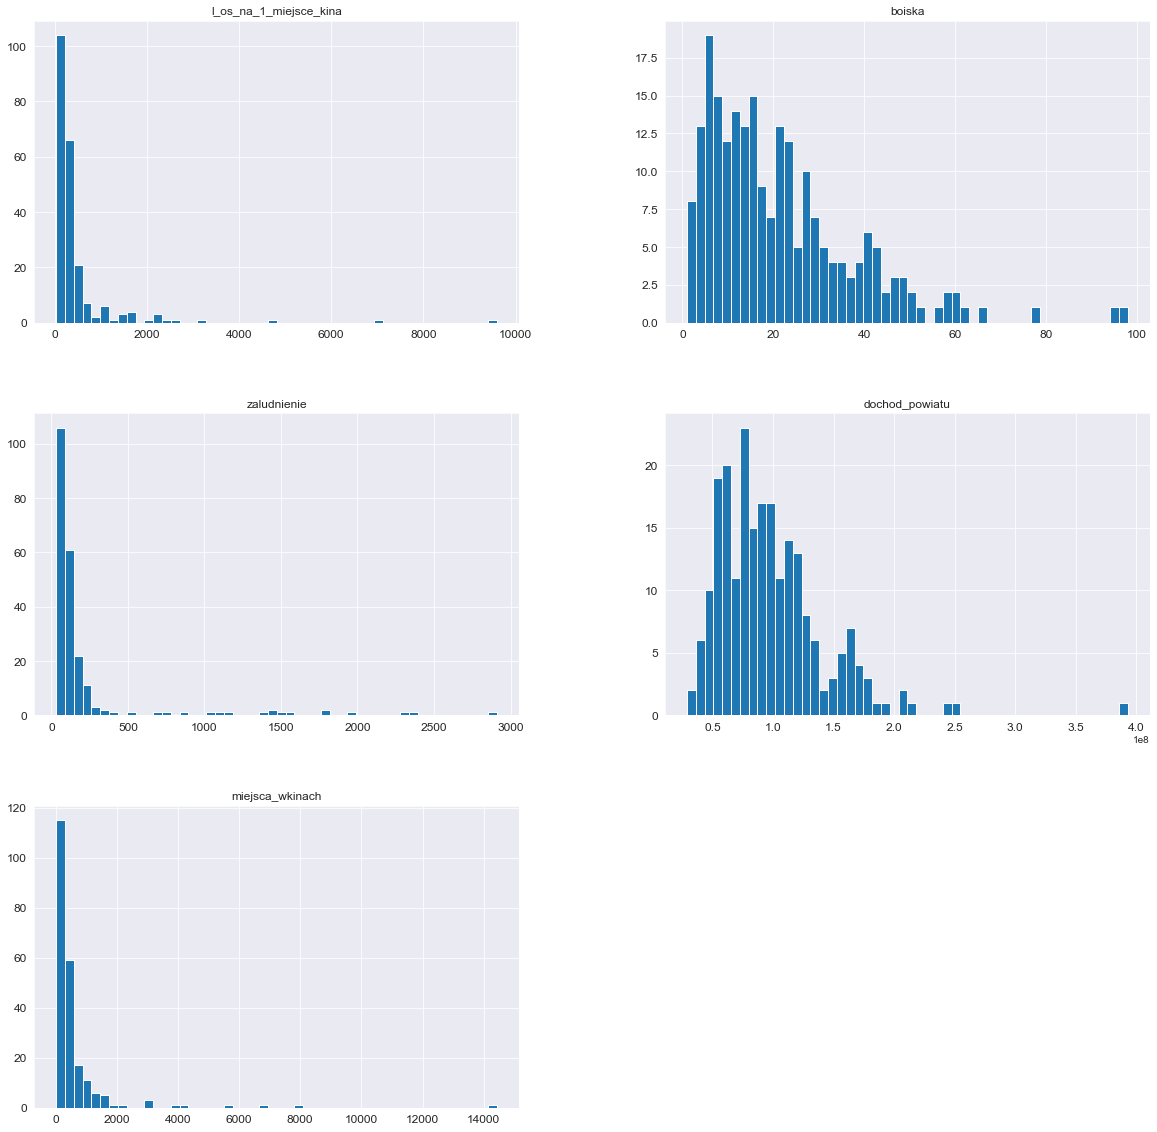

In [43]:
df_num.hist(figsize=(20,20),bins=50, xlabelsize=12, ylabelsize=12)

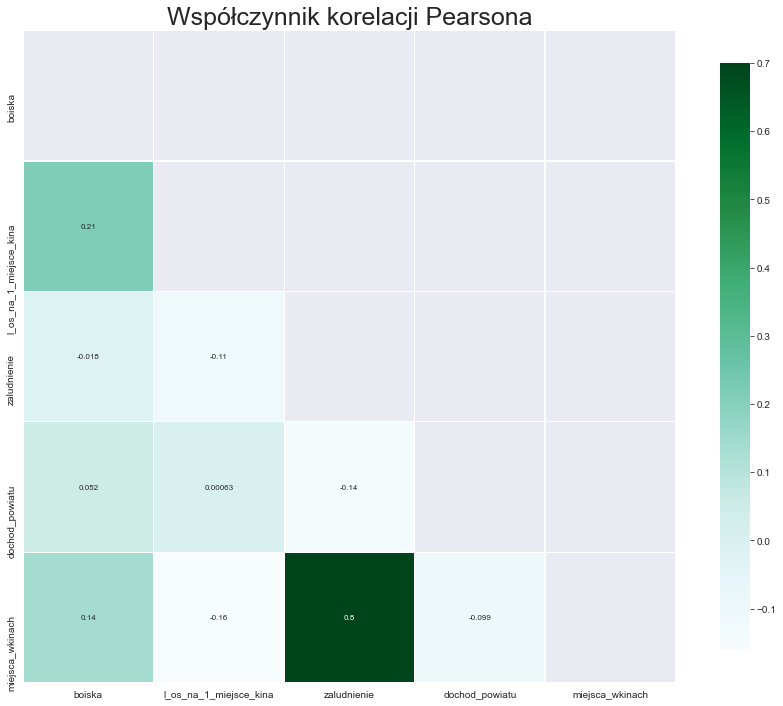

In [44]:
mask = np.zeros_like(df[names].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Współczynnik korelacji Pearsona',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(df[names].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [45]:
df[names].corr()

,boiska,l_os_na_1_miejsce_kina,zaludnienie,dochod_powiatu,miejsca_wkinach
boiska,1.000000,0.212735,-0.018248,0.052347,0.141518
l_os_na_1_miejsce_kina,0.212735,1.000000,-0.111789,0.000630,-0.161064
zaludnienie,-0.018248,-0.111789,1.000000,-0.138863,0.796160
dochod_powiatu,0.052347,0.000630,-0.138863,1.000000,-0.098507
miejsca_wkinach,0.141518,-0.161064,0.796160,-0.098507,1.000000


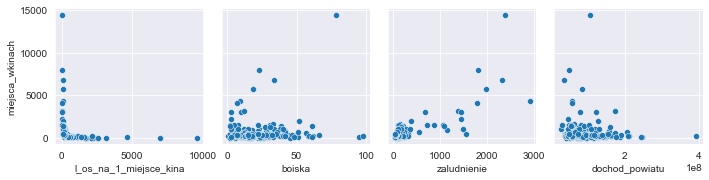

In [46]:
sns.pairplot(data=df_num,
            x_vars=df_num.columns[0:4],
            y_vars=['miejsca_wkinach'])

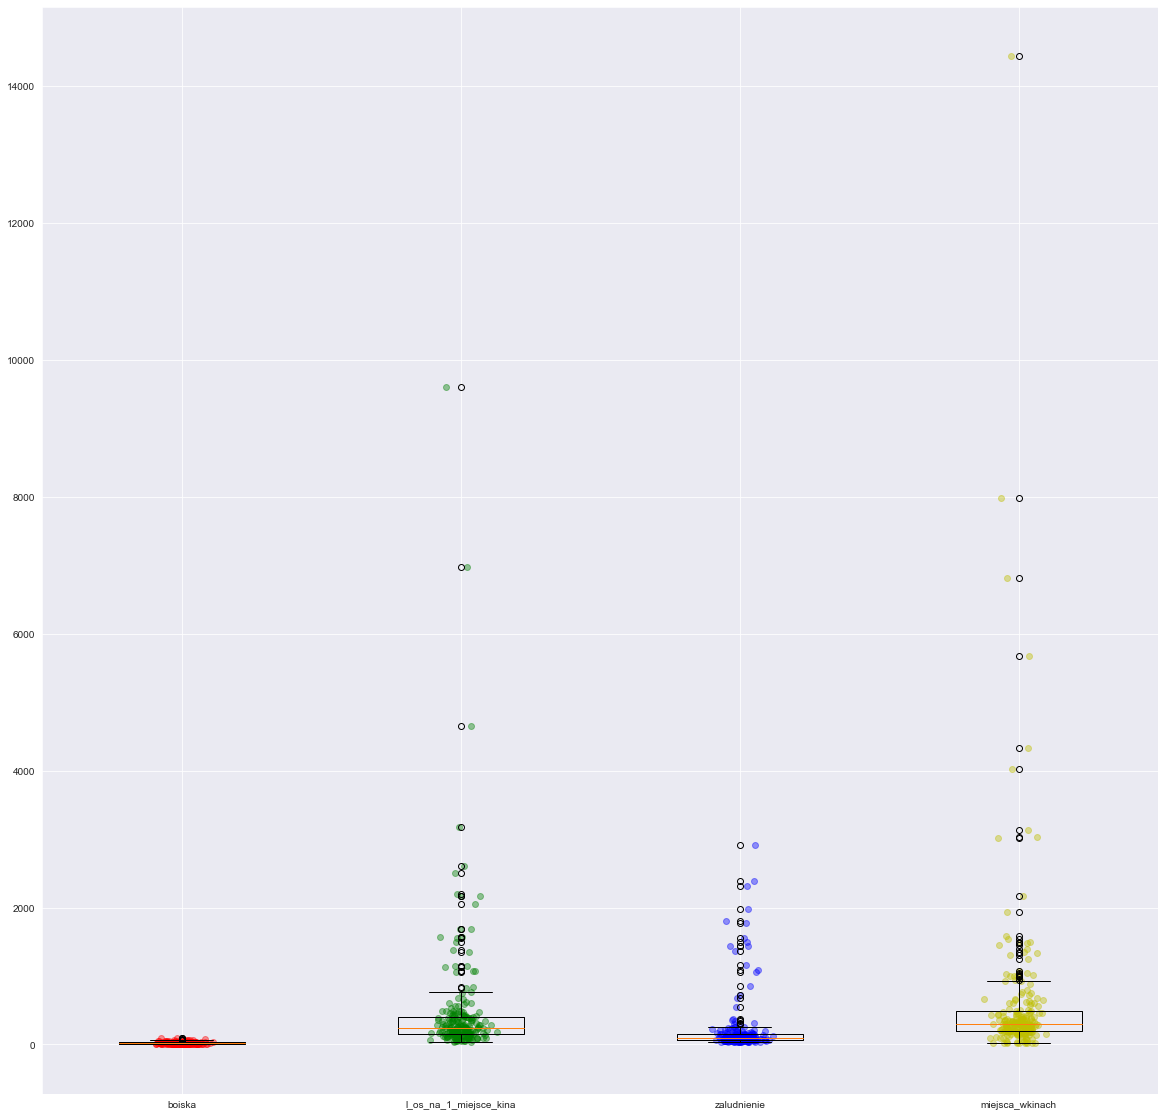

In [47]:
columnss = ["boiska","l_os_na_1_miejsce_kina","zaludnienie","miejsca_wkinach"]
vals, names, xs = [],[],[]
for i, col in enumerate(df_num[columnss]):
    vals.append(df_num[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_num[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(20, 20))
# plt.xticks(ticks= [i for i in range(len(names))],labels=names,size = 10)
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

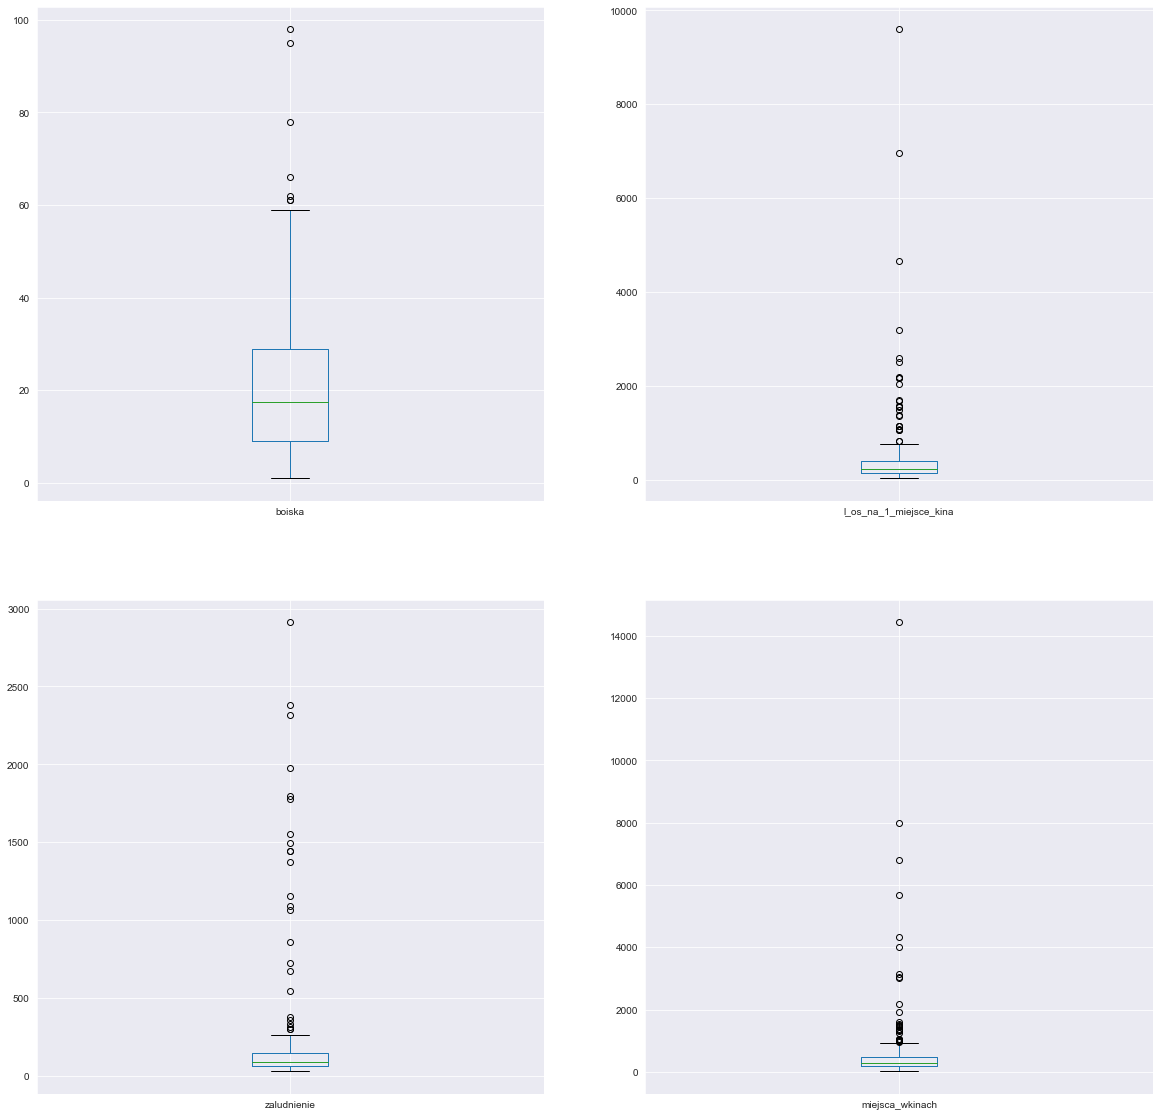

In [48]:
ax = df[["boiska",
          "l_os_na_1_miejsce_kina",
          "zaludnienie",
          "miejsca_wkinach"]].plot.box( subplots = True,
                                        layout=(2,2),
                                        figsize=(20,20),
                                        return_type='axes')

In [49]:
ax[0].figure.savefig('box.png')

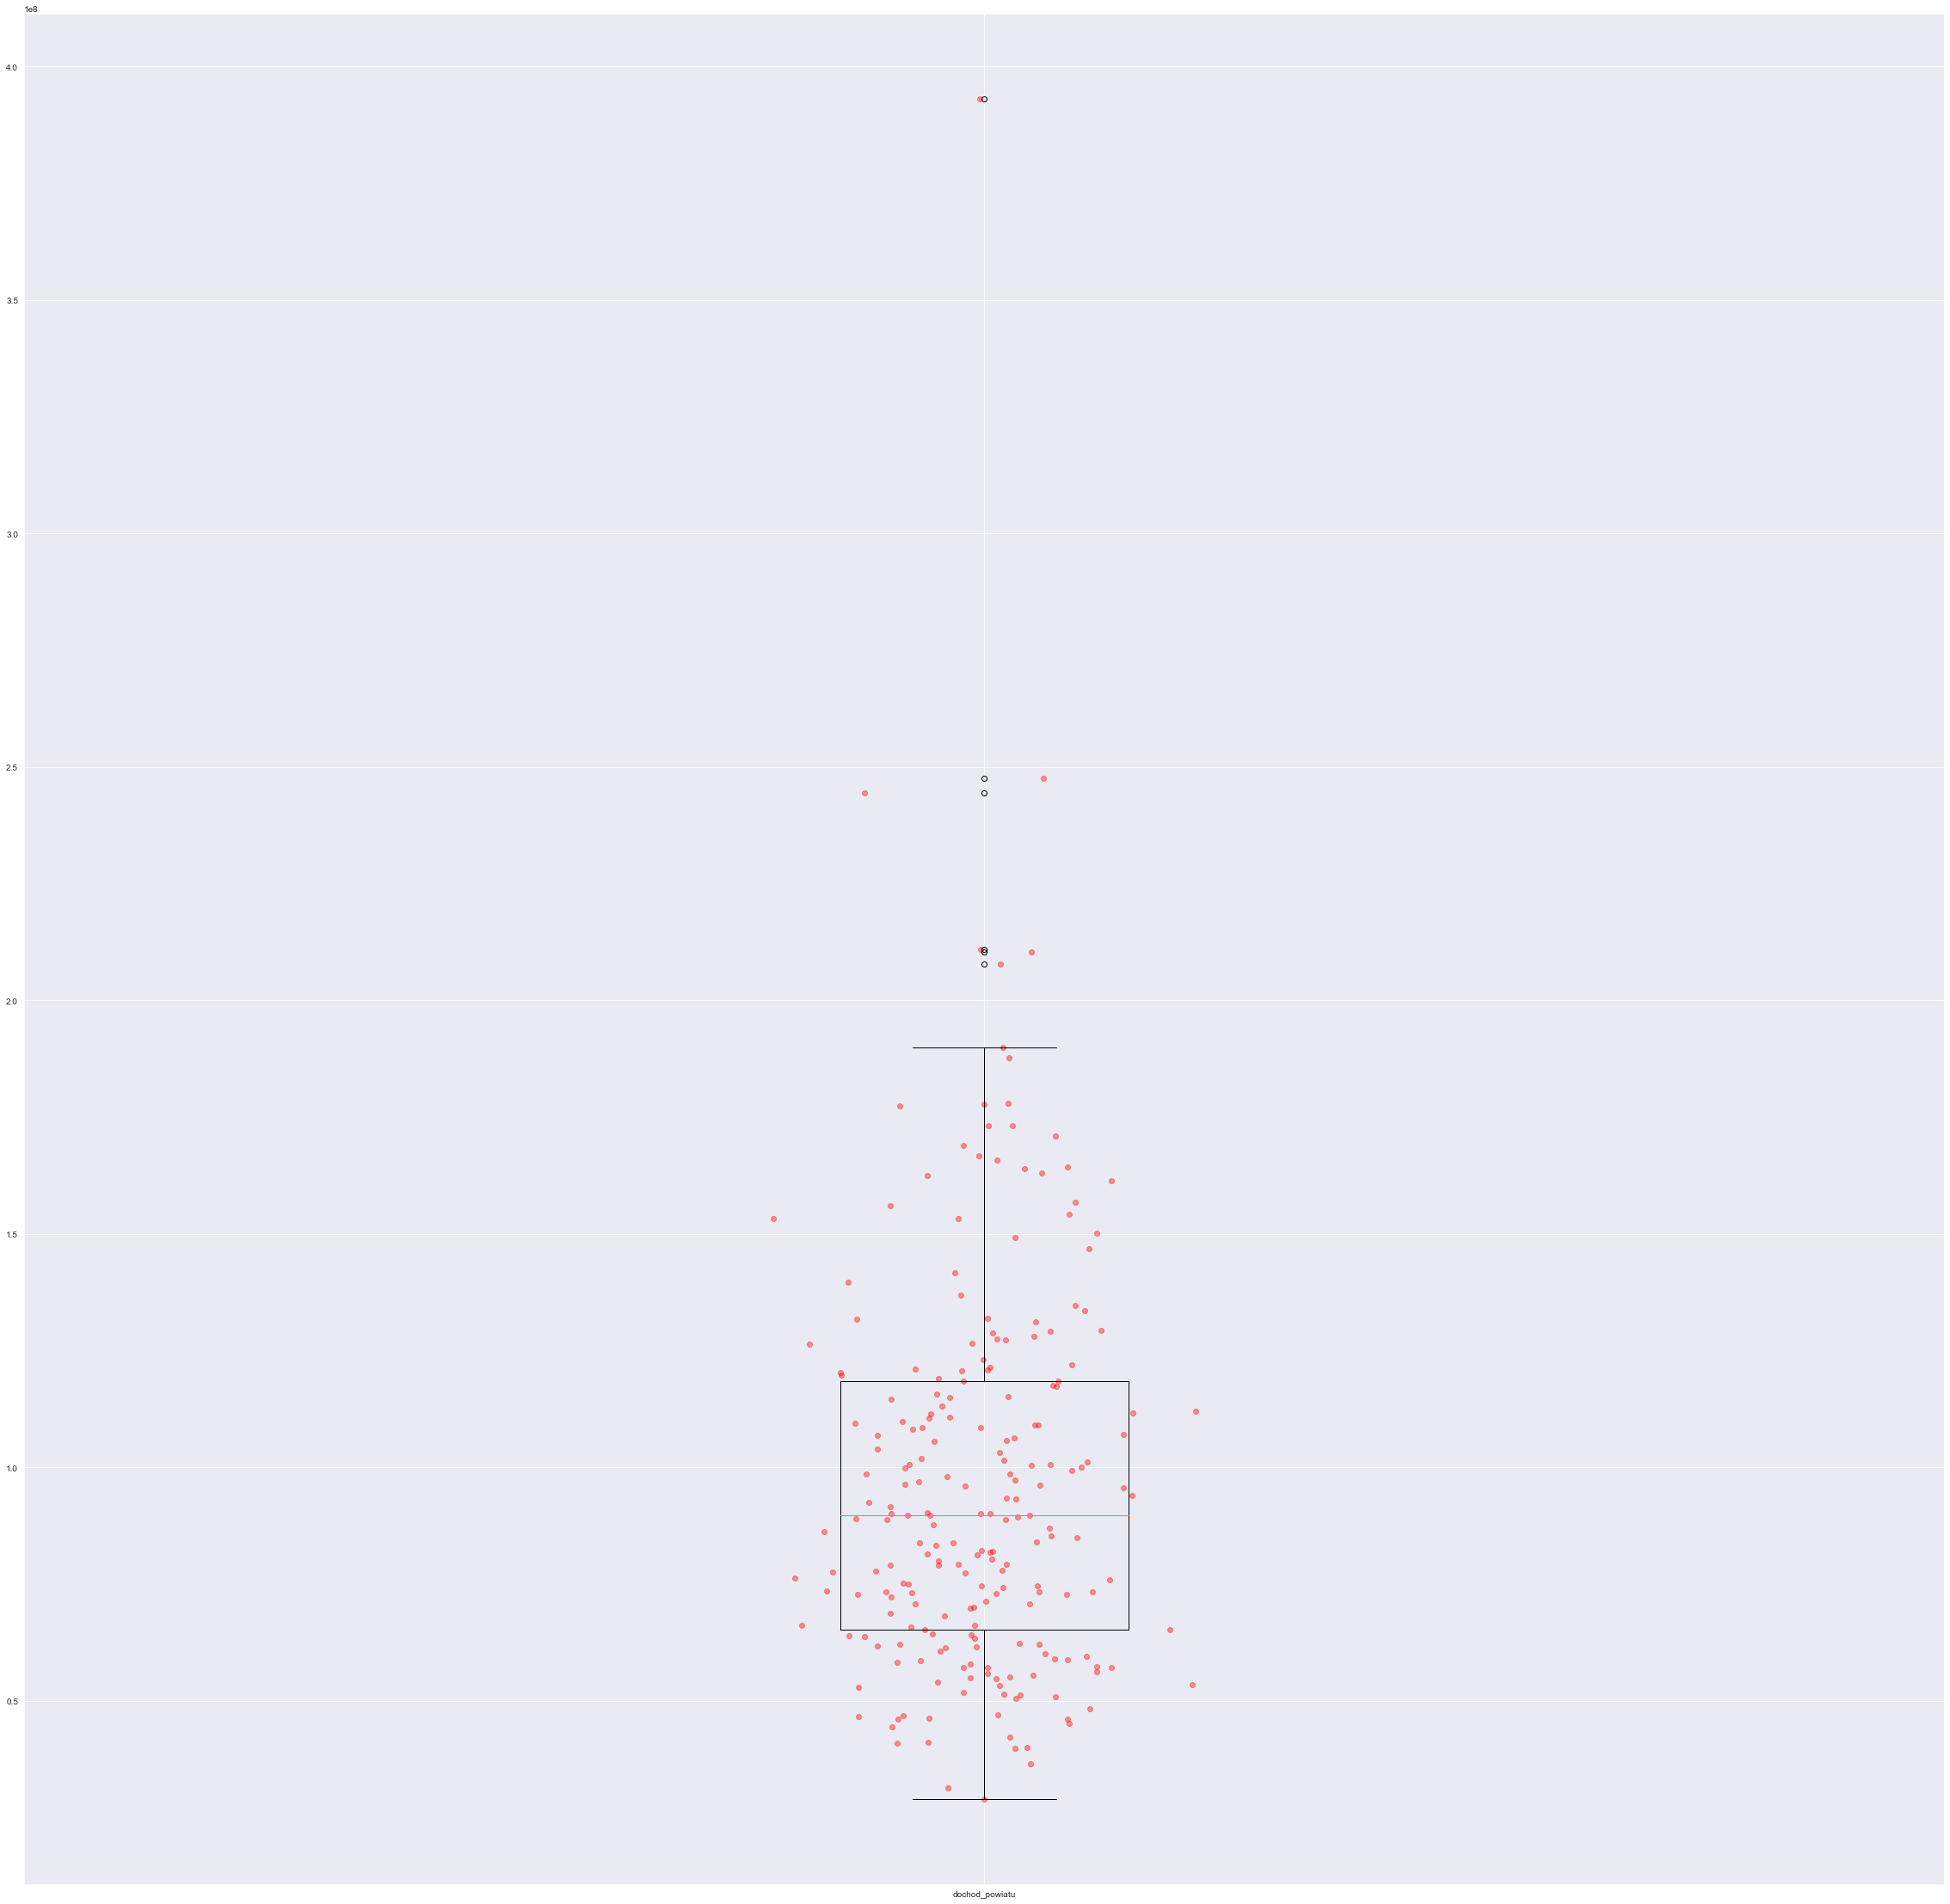

In [50]:
col2 = ["dochod_powiatu"]
vals, names, xs = [],[],[]
for i, col in enumerate(df_num[col2]):
    vals.append(df_num[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_num[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(40, 40))
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()

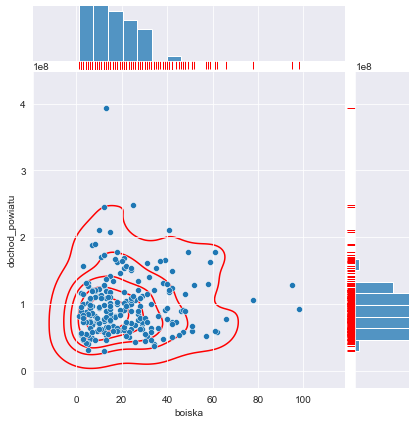

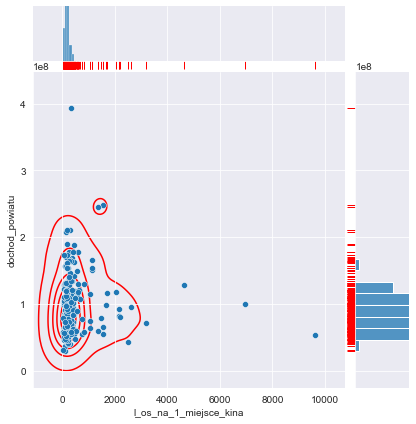

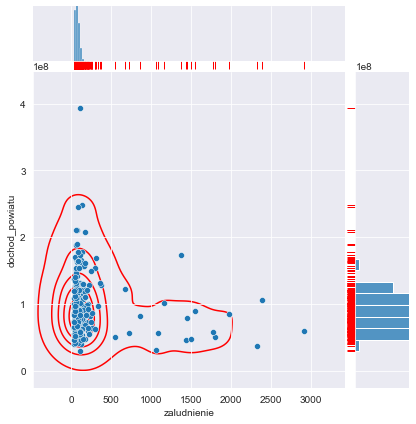

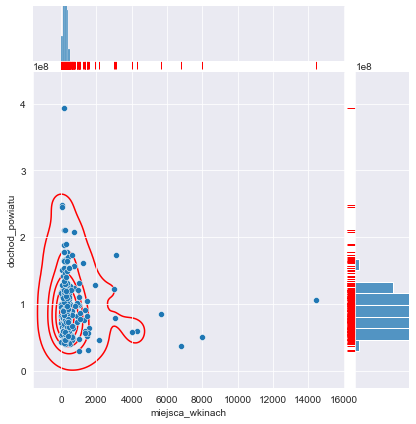

In [51]:
for i in ["boiska","l_os_na_1_miejsce_kina","zaludnienie","miejsca_wkinach"]:
    g = sns.jointplot(data=df_num, x=i, y="dochod_powiatu")
    g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)


usuwanie outlierów

In [52]:
from scipy import stats
import numpy as np
for col in ["boiska","l_os_na_1_miejsce_kina","zaludnienie","miejsca_wkinach", "dochod_powiatu"]:
    z_score = stats.zscore(df[col].to_numpy())
    is_outlier = z_score>3
    col_name = 'is_outlier_'+ col
    df[col_name] = is_outlier
df.head()

,Kod,Nazwa,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach,is_outlier_boiska,is_outlier_l_os_na_1_miejsce_kina,is_outlier_zaludnienie,is_outlier_miejsca_wkinach,is_outlier_dochod_powiatu
0,202000,Powiat dzierżoniowski,196,33,211,9.993607e+07,514,False,False,False,False,False
1,203000,Powiat głogowski,89,23,201,9.866435e+07,998,False,False,False,False,False
2,204000,Powiat górowski,109,12,47,1.272864e+08,320,False,False,False,False,False
3,205000,Powiat jaworski,2506,26,86,4.219230e+07,20,False,False,False,False,False
4,206000,Powiat karkonoski,3180,22,101,7.074027e+07,20,False,False,False,False,False


In [53]:
from copy import deepcopy
df_clean = deepcopy(df)

for col in ["boiska","l_os_na_1_miejsce_kina","zaludnienie","miejsca_wkinach","dochod_powiatu"]:
    col_name = 'is_outlier_' + col
    df_clean.drop(df_clean.index[df_clean[col_name]==True], axis = 0, inplace = True)


In [54]:
df_clean.is_outlier_boiska.value_counts()

False    209
Name: is_outlier_boiska, dtype: int64

In [55]:
df_clean.head()


,Kod,Nazwa,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach,is_outlier_boiska,is_outlier_l_os_na_1_miejsce_kina,is_outlier_zaludnienie,is_outlier_miejsca_wkinach,is_outlier_dochod_powiatu
0,202000,Powiat dzierżoniowski,196,33,211,9.993607e+07,514,False,False,False,False,False
1,203000,Powiat głogowski,89,23,201,9.866435e+07,998,False,False,False,False,False
2,204000,Powiat górowski,109,12,47,1.272864e+08,320,False,False,False,False,False
3,205000,Powiat jaworski,2506,26,86,4.219230e+07,20,False,False,False,False,False
4,206000,Powiat karkonoski,3180,22,101,7.074027e+07,20,False,False,False,False,False


boiska                       AxesSubplot(0.125,0.536818;0.352273x0.343182)
l_os_na_1_miejsce_kina    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
zaludnienie                     AxesSubplot(0.125,0.125;0.352273x0.343182)
miejsca_wkinach              AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

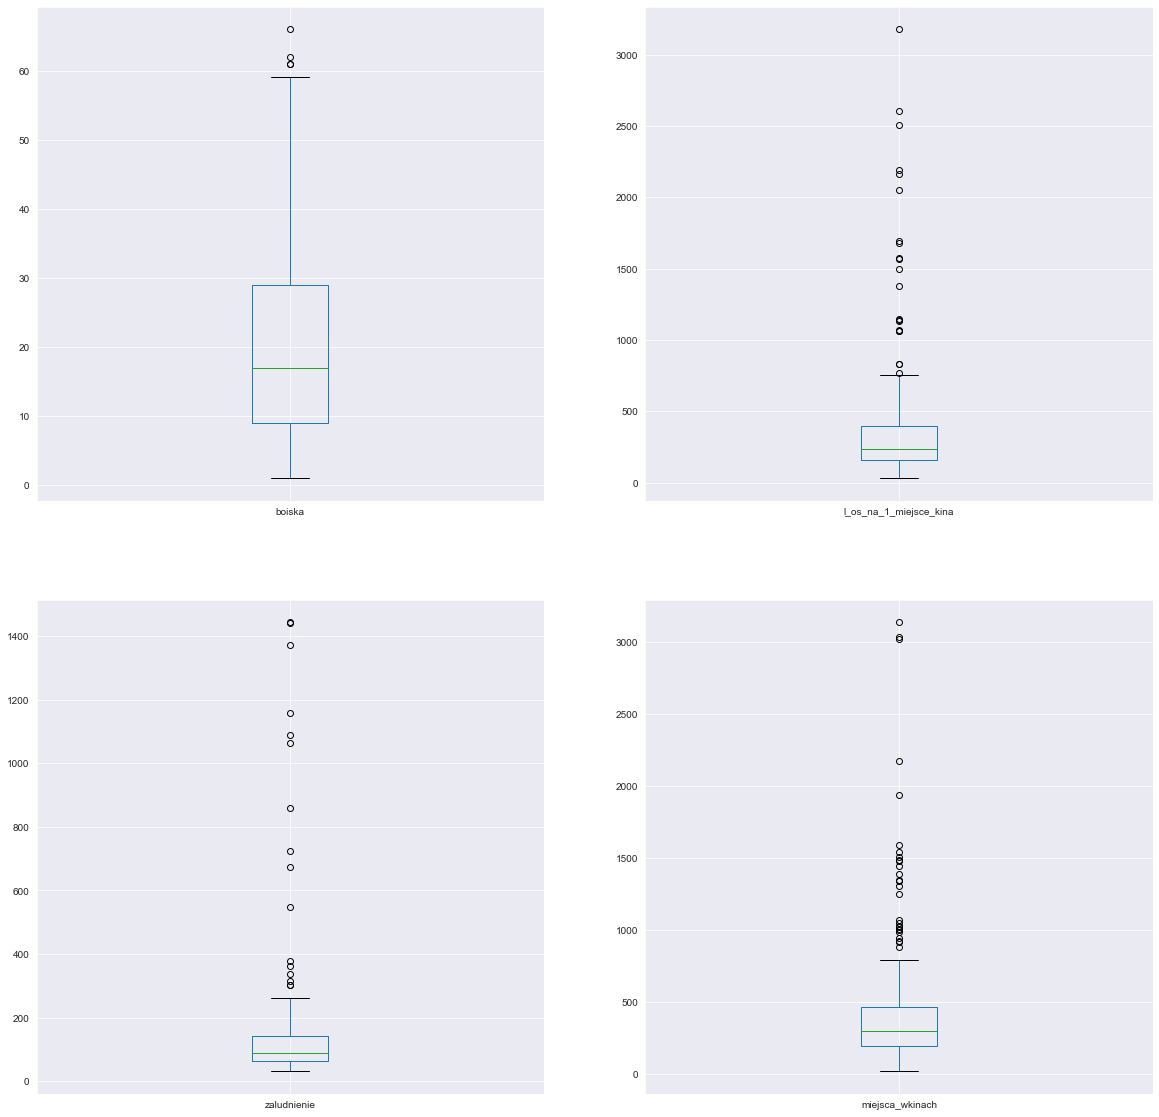

In [56]:
## po usunięciu outlierów
df_clean[["boiska",
          "l_os_na_1_miejsce_kina",
          "zaludnienie",
          "miejsca_wkinach"]].plot.box( subplots = True,
                                        layout=(2,2),
                                        figsize=(20,20),
                                        return_type='axes')

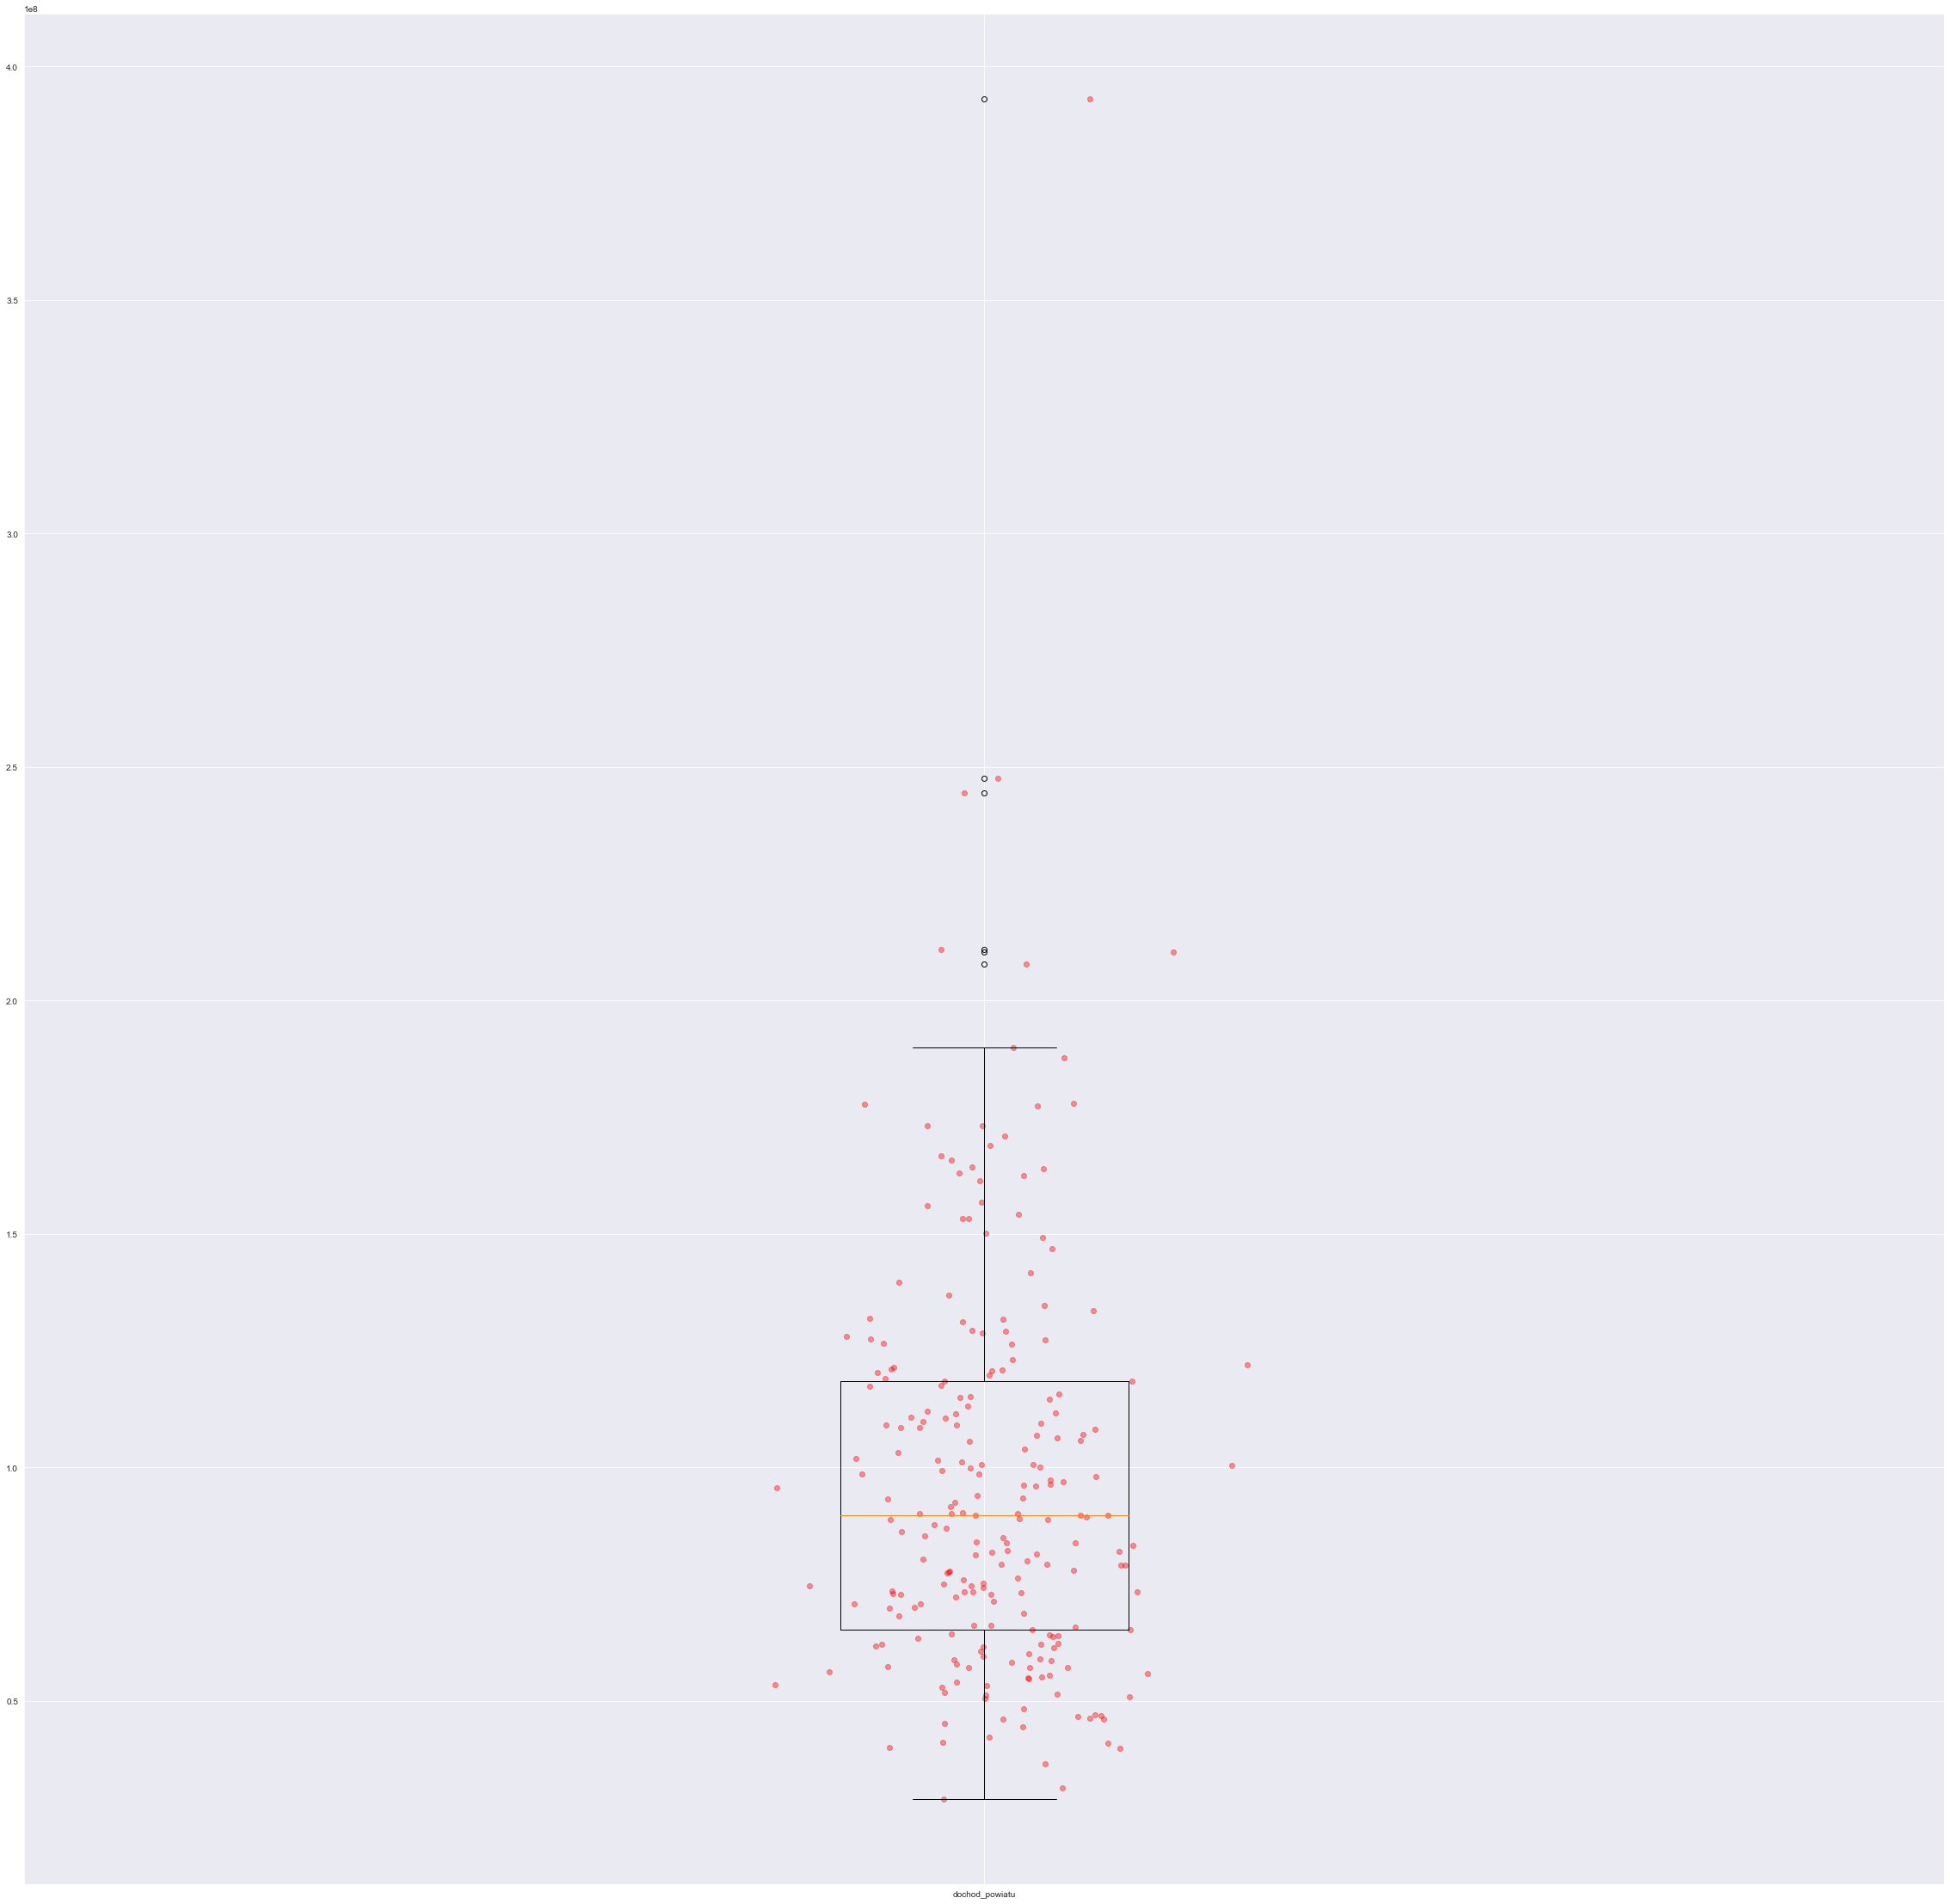

In [57]:

col2 = ["dochod_powiatu"]
vals, names, xs = [],[],[]
for i, col in enumerate(df_num[col2]):
    vals.append(df_num[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_num[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

plt.figure(figsize=(40, 40))
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()


In [58]:
del df_clean['is_outlier_boiska']
del df_clean['is_outlier_l_os_na_1_miejsce_kina']
del df_clean['is_outlier_zaludnienie']
del df_clean['is_outlier_miejsca_wkinach']
del df_clean['is_outlier_dochod_powiatu']

In [59]:
df_clean.head()

,Kod,Nazwa,l_os_na_1_miejsce_kina,boiska,zaludnienie,dochod_powiatu,miejsca_wkinach
0,202000,Powiat dzierżoniowski,196,33,211,9.993607e+07,514
1,203000,Powiat głogowski,89,23,201,9.866435e+07,998
2,204000,Powiat górowski,109,12,47,1.272864e+08,320
3,205000,Powiat jaworski,2506,26,86,4.219230e+07,20
4,206000,Powiat karkonoski,3180,22,101,7.074027e+07,20


In [60]:
df_clean.to_csv(r'/Users/majkamiezianko/Desktop/MNWS/projekt3/data_cleaned2.csv', index = False)

In [63]:
X = df_clean['zaludnienie']
y = df_clean['miejsca_wkinach']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [65]:
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR

scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean r^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[nan, nan, nan, nan, nan]

Mean r^2: nan (+/- nan)
